In [1]:
import matplotlib.pyplot as plt

from exchange import Exchange
from market import Market
from dummy_trader import DummyTrader
from market_maker import MarketMaker
from utils import generate_price_stream

/Users/zhouzijian/miniconda3/envs/cta_trader/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
tick_size = 1
arparams = [.75, .25]
maparams = [.65, .35]
price_stream_1 = generate_price_stream(200, arparams, maparams, tick_size)
price_stream_2 = price_stream_1 + generate_price_stream(200, [-0.75], [2.0], tick_size) - 100


In [4]:
market1 = Market(price_stream_1, tick_size)
market2 = Market(price_stream_2, tick_size)

In [5]:
exchange = Exchange()

In [6]:
mm = MarketMaker(0, 20, 0.2)
dummy1 = DummyTrader(1)
dummy2 = DummyTrader(2)

In [7]:
exchange.register_player(mm)
exchange.register_player(dummy1)
exchange.register_player(dummy2)

In [8]:
while not (market1.is_end or market2.is_end):
    o1 = dummy1.place_order(exchange, market1, market2)
    o2 = dummy2.place_order(exchange, market1, market2)
    om = mm.place_order(exchange, market1, market2)
    exchange.receive_orders(o1 + o2 + om)
    exchange.match_orders()
    market1.tick()
    market2.tick()
    

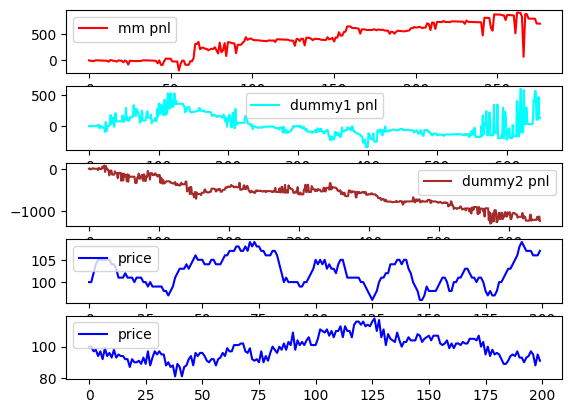

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
ax1.plot(mm.pnl, c="red", label="mm pnl")
ax1.legend()
ax2.plot(dummy1.pnl, c="cyan", label="dummy1 pnl")
ax2.legend()
ax3.plot(dummy2.pnl, c="brown", label="dummy2 pnl")
ax3.legend()
ax4.plot(price_stream, c="blue", label="price")
ax4.legend()
ax5.plot(price_stream_2, c="blue", label="price")
ax5.legend()
